<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%ED%95%99%EC%83%9D%EC%83%81%EB%8B%B4%EC%9E%90%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 실행하고 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}six.csv', encoding = 'cp949')

df.head(6)

In [2]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
#출결인정 메모
#from datetime import datetime
from pytz import timezone
from datetime import datetime
today = datetime.now(timezone('Asia/Seoul'))

name = input("이름:")
snum = input("번호:")
print("{}(306{})학생이 담임교사 상담으로 늦게 입실함을 깊이 양해부탁드립니다.".format(name, snum.zfill(2)))
print("---------------------------------------------------------------------------------")
print(today.strftime('%m-%d %H:%M:%S'))
print("3-6 담임 황성삼 (인)")


In [ ]:
#변수(열)명을 가나다순으로 정렬
df = df.reindex(sorted(df.columns), axis=1)
print(df)

In [ ]:
#특정열을 기준으로 추출
df.iloc[:, 102:120]

In [ ]:
#이름으로 6모 모의고사 열람
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['이름','등급_국어_6모', '등급_수학_6모',  '등급_영어_6모', '선택과목명_탐구1_6모', '등급_탐구1_6모', '선택과목명_탐구2_6모', '등급_탐구2_6모']]
df_name

Text(0.5, 1.0, 'D고 3-6반 6모 백분위평균 구간별 점수')

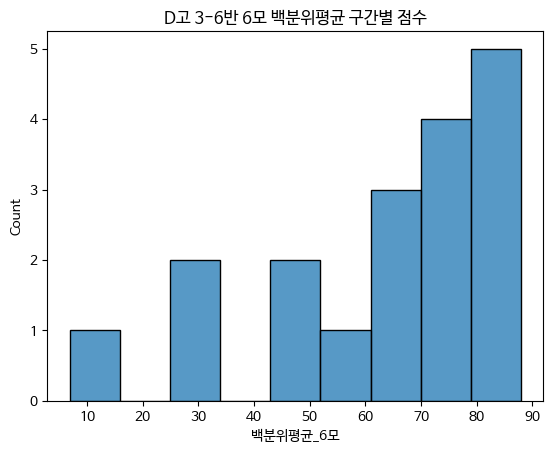

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
sns.histplot(df.백분위평균_6모, bins=9, kde=False)
plt.title("D고 3-6반 6모 백분위평균 구간별 점수")

In [ ]:
# 특정 '문자열'을 포함하는 열(column)을 뽑아내는 코드: 
math_columns = [col for col in df if '영어' in col]
print(math_columns)

['내신_영어', '모의고사등급_영어', '영어사교육', '등급_영어_3모', '원점수_영어_5모', '등급_영어_5모']


In [ ]:
#이름으로 다름 정보 출력
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['이름', '주소', '어머니', '신뢰하는이', '자는시간', '운동', '스트레스조절', '학교만족도', '스마트폰시간', '고민친구']]
df_name

In [ ]:
#이름으로 희망대학, 희망학과
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['이름', '사교육',  'MBTI',  '희망대학', '희망학과', '희망직업']]
df_name

In [ ]:
#이름으로 탐구1과목과 탐구2과목
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['이름', '탐구1', '탐구2']]
df_name

In [ ]:
#이름으로 행동특성및종합의견
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['이름', '행동특성및종합의견']]
df_name

In [ ]:
#정시가 유리하다고 대답한 학생
df_jsi = df[df.수시정시 == '정시']
df_jsi_st = df_jsi[['이름', '성별', '수시정시', '내신_일이학년', '등급평균_6모']]
df_jsi_st

In [ ]:
#6월 모의고사가 일이학년 내신보다 좋은 학생
df_mockbetter = df[df.내신_일이학년 >= df.등급평균_6모]
df_mockbetter = df_mockbetter[['이름', '내신_일이학년', '등급평균_6모']]
print(df_mockbetter)

In [ ]:
#내신보다 모의고사가 제일 잘 나온 학생찾기: copy()가 빠지만 경고메시지가 나옴

df_mockbetter = df[df.내신_일이학년 >= df.등급평균_6모].copy()
df_mockbetter.loc[:, '등급향상'] = df_mockbetter.내신_일이학년 - df_mockbetter.등급평균_6모
df_mockbetter = df_mockbetter[['이름', '내신_일이학년', '등급평균_6모', '등급향상']]
df_mockbetter = df_mockbetter.sort_values('등급향상', ascending=False)
best_improvement = df_mockbetter.iloc[0]
print(f"일이학년 내신보다 모의고사가 제일 잘 나온 학생은 {best_improvement['등급향상']:.2f}등급 향샹된 {best_improvement['이름']}입니다.")
print("----------------------------------------------------------------------------------------------------------------------------")
print(df_mockbetter)

In [ ]:
# 성은 그대로 이름부분은 *로 표시하는 코드
df_mockbetter = df[df.내신_일이학년 >= df.등급평균_6모].copy()
df_mockbetter.loc[:, '등급향상'] = df_mockbetter.내신_일이학년 - df_mockbetter.등급평균_6모
df_mockbetter['이름'] = df_mockbetter['이름'].apply(lambda x: x[0] + '*' * (len(x) - 1))
df_mockbetter = df_mockbetter[['이름', '내신_일이학년', '등급평균_6모', '등급향상']]
df_mockbetter = df_mockbetter.sort_values('등급향상', ascending=False)
best_improvement = df_mockbetter.iloc[0]
print(f"The person with the most improvement is {best_improvement['이름']} with a grade improvement of {best_improvement['등급향상']:.2f}.")
print(df_mockbetter)

In [ ]:
# 특정 평균성적 이하 검색
mi = int(input("평균성적이 몇점 이하로 겸색할까요?:"))

# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.성적 <= mi)]

# value_counts()로 빈도를 세고, sort_index() 기준으로 정렬!
list_1 =  df_interval["성적"].value_counts().sort_index()
print(list_1)
print("------------------------------")
print(df_interval[['이름', '성별', '성적']])
#print(str(len(list_1))+"명")
print("------------------------------")
print("{}점 이하 {}명".format(mi, len(df_interval)))
#자료 https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts8

In [ ]:
# 백분위 검색
mi = int(input("백분위 평균_3모 몇% 이상으로 검색할까요?:"))

# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.백분위평균_3모 >= mi)]

# value_counts()로 빈도를 세고, sort_index() 기준으로 정렬!
list_1 =  df_interval["백분위평균_3모"].value_counts().sort_index()
print(list_1)
print("------------------------------")
print(df_interval[['이름', '성별', '백분위평균_3모']])
#print(str(len(list_1))+"명")
print("------------------------------")
print("{}% 이상 {}명".format(mi, len(df_interval)))
#자료 https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts8

In [ ]:
#수시정시 별 응답자수 
df.groupby('수시정시').count()

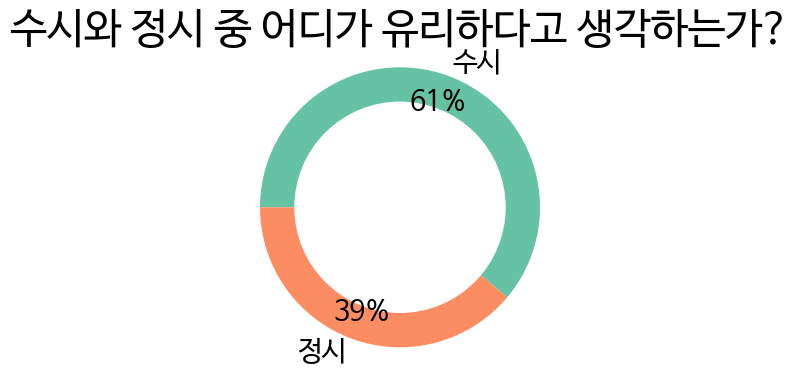

In [25]:
#수시와 정시 중 유리하다고 대답한 학생들의 그래프
import matplotlib.pyplot as plt
import pandas as pd

# Group data by '수시정시' column
df_susi = df.groupby('수시정시').count()

# Create data for the plot
labels = df_susi.index
sizes = df_susi['학번']
colors = ['#66c2a5', '#fc8d62']
explode = [0, 0] # set the explosion parameter for the first slice

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))
wedges, labels, _ = ax.pie(sizes, labels=labels, colors=colors, startangle=180, counterclock=False,
       explode=explode, autopct='%1.0f%%', pctdistance=0.8, textprops={'fontsize': 2*plt.rcParams['font.size']})

# Add a white circle in the middle to create the half doughnut effect
circle = plt.Circle((0,0), 0.75, color='white')
ax.add_artist(circle)

ax.axis('equal')
plt.title('수시와 정시 중 어디가 유리하다고 생각하는가?', fontsize=3*plt.rcParams['font.size'])
plt.show()

In [ ]:
#수시전형 종류: 61%(종합), 22%(교과), 논술(6%), 기타(11%)
df_susi_type = df.groupby('수시전형유형').count()
df_ratio = round(df_susi_type/len(df.학번)*100)

print(df_ratio)

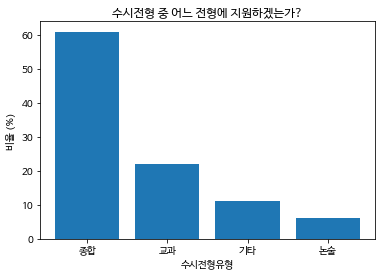

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_susi_type = df.groupby('수시전형유형').count()
df_ratio = round(df_susi_type['학번'] / len(df['학번']) * 100)

# Sort the dataframe by the ratio values in descending order
df_ratio_sorted = df_ratio.sort_values(ascending=False)

plt.bar(df_ratio_sorted.index, df_ratio_sorted)
plt.xlabel('수시전형유형')
plt.ylabel('비율 (%)')
plt.title('수시전형 중 어느 전형에 지원하겠는가?')
plt.show()


In [ ]:
#변수(열)별 결측값 갯수 확인
#np.sum(pd.isnull(df))
#np.sum(pd.isnull(df.아버지))
df['아버지'].isnull().sum()

0

In [ ]:
#희망학과가 '간호'인 경우를 검색
df_nurse = df['희망학과'].str.contains('[생명]') 
#df_nurse = df_nurse.dropna(['희망학과'])
df_subset = df[df_nurse]
print(df_subset)

In [27]:
#변수(열)의 갯수
cols = len(df.axes[1])
print(cols) 

149


In [ ]:
# 회장/부회장 경험있는 학생수
mi = int(input("회장경험 몇회 이상으로 겸색할까요?:"))

# mi이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.회장경험 >= mi)]

# value_counts()로 빈도를 세고, sort_index() 기준으로 정렬!
list_1 =  df_interval["회장경험"].value_counts().sort_index()
print(list_1)
print("------------------------------")
print(df_interval[['이름', '성별', '회장경험']])
#print(str(len(list_1))+"명")
print("------------------------------")
print("{}회 이상 학급회장/부회장 경험:{}명".format(mi, len(df_interval)))

In [ ]:
#이름을 넣어 해당학생의 학급석차 출력
name = input("이름:")

# Sort DataFrame by '내신_전과목' in descending order
df_sorted = df.sort_values('내신_일이학년', ascending=False)

# Filter DataFrame to only include rows with the input name
df_filtered = df_sorted[df_sorted['이름'] == name]

# Calculate rank of first row in filtered DataFrame
rank = df.index.get_loc(df_filtered.index[0]) + 1

# Sort rank values
rank_list = sorted(list(df_sorted['내신_일이학년']), reverse=False)
sorted_rank = rank_list.index(df_filtered['내신_일이학년'].iloc[0]) + 1

# Print the result
print(f"{name}의 '내신_일이학년' 6반에서의 석차는 {sorted_rank}등 입니다.")

In [ ]:
#일이학년 석차순으로 출력하기
df_sorted = df.sort_values('내신_일이학년', ascending=True)
print(df_sorted[['이름', '내신_일이학년', '석차_전교']])

In [ ]:
exam_march = [col for col in df if '선택' in col]
print(exam_march)

['선택형수능', '선택과목명_탐구1_3모', '선택과목명_탐구2_3모', '선택과목명_국어_5모', '선택과목명_수학', '선택과목명_탐구1_5모', '선택과목명_탐구2_5모']


In [ ]:
#이름을 입력하면 해당학생의 성적 4가지(내신, 3모, 5모, 6모)를 melt시켜서 그래프로 그려 png로 저장

import pandas as pd
import matplotlib.pyplot as plt

name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['이름','내신_일이학년', '등급평균_3모', '등급평균_5모', '등급평균_6모']]

df_melt = pd.melt(df_name, id_vars=['이름'], value_vars=['내신_일이학년', '등급평균_3모', '등급평균_5모', '등급평균_6모'], var_name='test', value_name='result')

# Extract the required columns from the melted DataFrame
x_values = df_melt['test']
y_values = df_melt['result']

# Create a scatter plot
plt.scatter(x_values, y_values)

# Connect the points with a line
plt.plot(x_values, y_values, '-')

# Get the value of '내신_일이학년'
내신_일이학년_value = df_name['내신_일이학년'].values[0]  
    
# Draw a horizontal line at '내신_일이학년' value    
plt.axhline(내신_일이학년_value, color='r', linestyle=':') 

# Set the axis labels
#plt.xlabel('시험')
plt.ylabel('등급')

# Reverse the y-axis
plt.gca().invert_yaxis()

# Set the plot title
plt.title(name+' 학생의 3학년 성적추이')


# Annotate '내신_일이학년' value on the plot
plt.text(0.5, 내신_일이학년_value, str(내신_일이학년_value), color='r', ha='right', va='bottom')

# Show the plot
plt.show()

In [ ]:
#이름을 입력하면 해당학생의 성적 4가지(내신, 3모, 5모, 6모)를 melt시켜서 그래프로 그려 pdf로 저장
import pandas as pd
import matplotlib.pyplot as plt

filename = ['이성계', '이방원', '이도', '이산']

# loop over each filename
for name in filename:
    df_name = df[(df.이름 == name)]
    df_name = df_name[['이름','내신_일이학년', '등급평균_3모', '등급평균_5모', '등급평균_6모']]
    df_melt = pd.melt(df_name, id_vars=['이름'], value_vars=['내신_일이학년', '등급평균_3모', '등급평균_5모', '등급평균_6모'], var_name='test', value_name='result')
    x_values = df_melt['test']
    y_values = df_melt['result']
    plt.scatter(x_values, y_values)
    plt.plot(x_values, y_values, '-')
    
    내신_일이학년_value = df_name['내신_일이학년'].values[0]  # Get the value of '내신_일이학년'
    
    plt.axhline(내신_일이학년_value, color='r', linestyle=':')  # Draw a horizontal line at '내신_일이학년' value
    
    plt.ylabel('등급')
    plt.gca().invert_yaxis()
    plt.title(name+' 학생의 3학년 성적추이')
    
    # Annotate '내신_일이학년' value on the plot
    plt.text(0.5, 내신_일이학년_value, str(내신_일이학년_value), color='r', ha='right', va='bottom')

    plt.savefig(f"/content/drive/MyDrive/python/deungchon/result_score/{name}_score.png", bbox_inches='tight')
    
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

filename = ['이성계', '이방원', '이도', '이산']

# loop over each filename
for name in filename:
    df_name = df[(df.이름 == name)]
    df_name = df_name[['이름','내신_일이학년', '등급평균_3모', '등급평균_5모', '등급평균_6모']]
    df_melt = pd.melt(df_name, id_vars=['이름'], value_vars=['내신_일이학년', '등급평균_3모', '등급평균_5모', '등급평균_6모'], var_name='test', value_name='result')
    x_values = df_melt['test']
    y_values = df_melt['result']
    plt.scatter(x_values, y_values)
    plt.plot(x_values, y_values, '-')
    
    내신_일이학년_value = df_name['내신_일이학년'].values[0]  # Get the value of '내신_일이학년'
    
    plt.axhline(내신_일이학년_value, color='r', linestyle=':')  # Draw a horizontal line at '내신_일이학년' value
    
    plt.ylabel('등급')
    plt.gca().invert_yaxis()
    plt.title(name+' 학생의 3학년 성적추이')
    
    # Annotate '내신_일이학년' value on the plot
    plt.text(0.5, 내신_일이학년_value, str(내신_일이학년_value), color='r', ha='right', va='bottom')


    plt.savefig(f"/content/drive/MyDrive/python/deungchon/result_score_pdf/{name}_score.pdf", bbox_inches='tight', format='pdf')
    
    plt.show()